In [26]:
from skimage.measure import compare_ssim
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2
import numpy as np

(683, 512, 3) (683, 512, 3)
SSIM: 0.9847482268969832


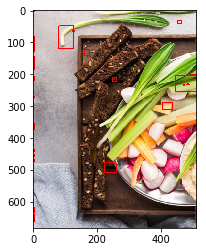

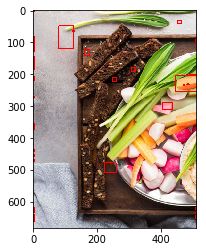

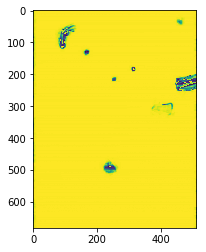

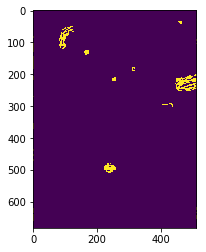

(683, 512, 3) (683, 512, 3)
SSIM: 0.9944149135736701


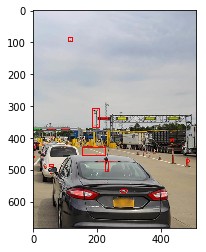

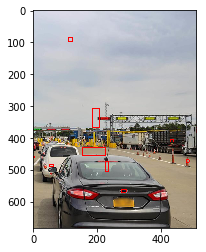

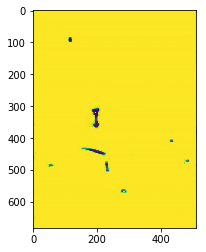

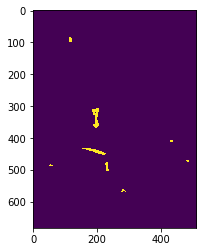

(683, 512, 3) (683, 512, 3)
SSIM: 0.9943774835414271


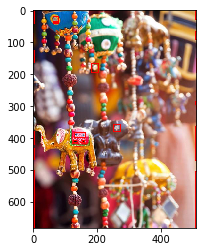

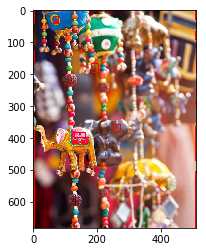

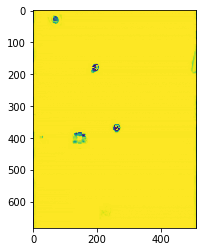

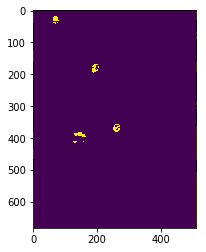

(683, 512, 3) (683, 512, 3)
SSIM: 0.8964432404232215


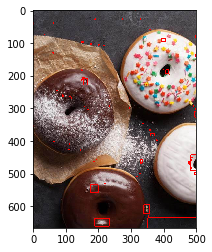

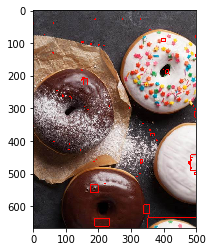

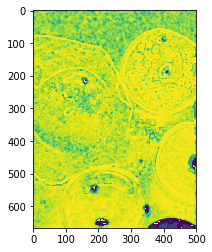

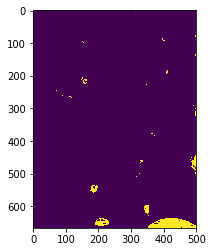

(683, 512, 3) (683, 512, 3)
SSIM: 0.9776285487299957


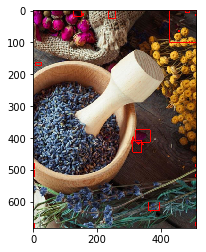

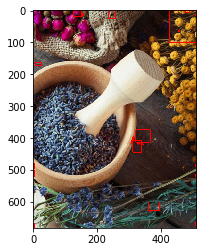

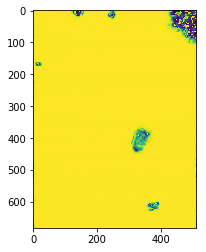

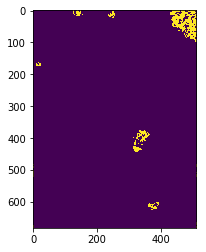

(683, 512, 3) (683, 512, 3)
SSIM: 0.9239180754318148


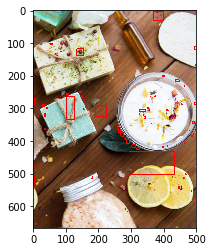

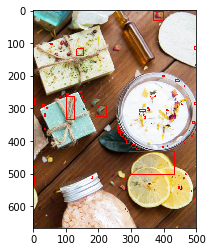

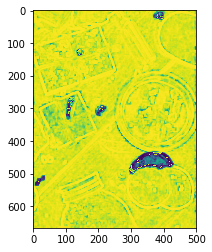

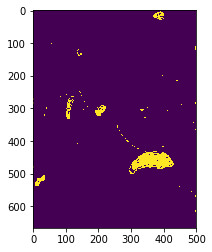

(683, 512, 3) (683, 512, 3)
SSIM: 0.9299086839102417


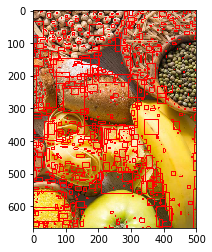

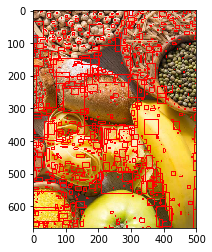

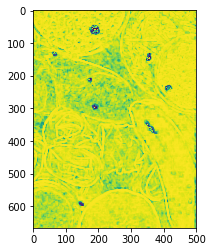

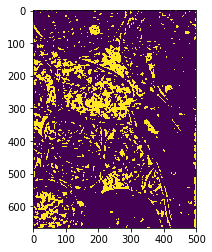

(683, 512, 3) (683, 512, 3)
SSIM: 0.9696614764707107


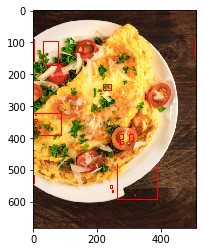

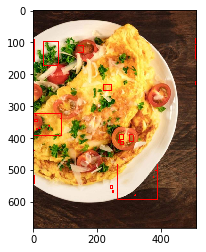

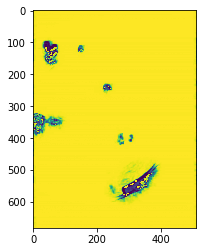

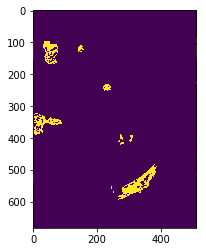

(683, 512, 3) (683, 512, 3)
SSIM: 0.956251912920201


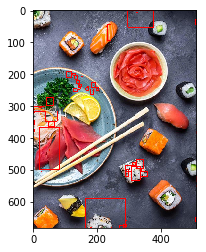

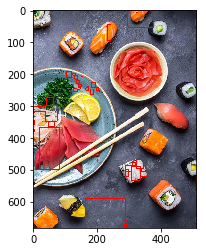

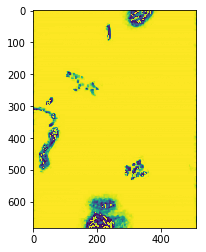

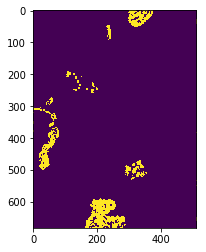

(683, 512, 3) (683, 512, 3)
SSIM: 0.6015161945464583


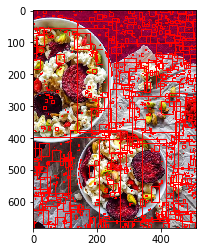

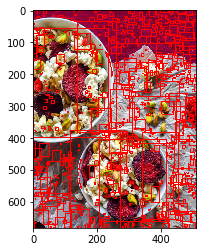

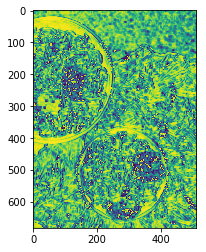

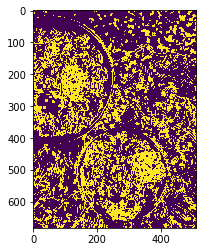

In [43]:
#Load and split the image
import glob

for file in glob.glob('./Images/*.jpg'):
    img = cv2.imread(file)
    height, width, channel = img.shape
    
    # load the two input images
    imageA = img[:, :int(width/2), :]
    imageB = img[:, int(width/2):, :]
    print(img_a.shape, img_b.shape)

    # convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(score))


    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)


    # loop over the contours
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two
        # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # show the output images
    plt.imshow(np.array(cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB)))
    plt.show()
    plt.imshow(np.array(cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB)))
    plt.show()
    plt.imshow(diff)
    plt.show()
    plt.imshow(thresh)
    plt.show()
    
    #plt.imshow(np.array(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    #plt.show()
    
    

In [3]:
from sys import executable                                                        
print(executable)

/home/ubuntu/anaconda3/envs/python3/bin/python
